# Question 1 (Method 1 : Using Loop) 
Solution of Laplace's equation in 2D square plane using Gauss Seidel Relaxation Technique

Solution Converged after 662 iterations


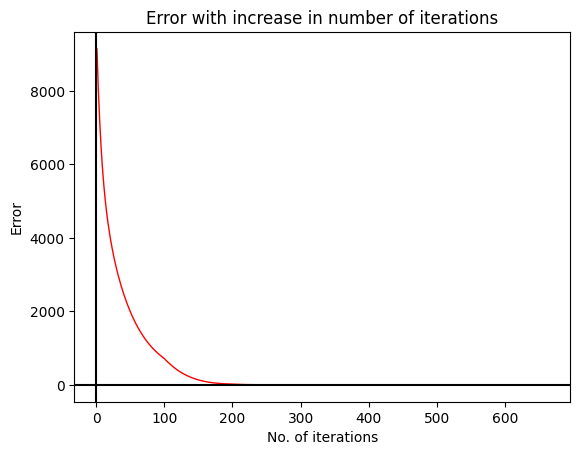

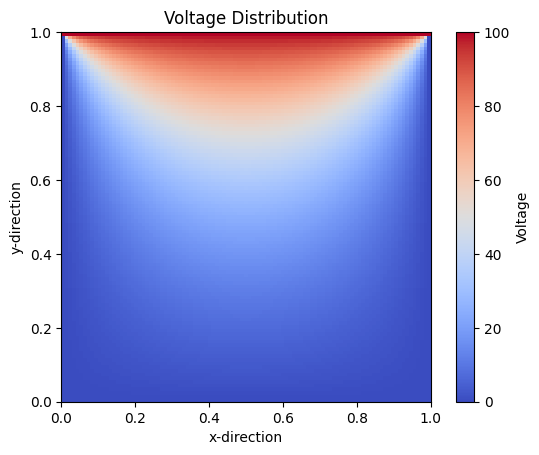

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L=1                         #Length of the 2D surface (in m)
dx=0.01                     #Grid spacing (in m)
N=int(L/dx+1)
max_iteration=20000
tol=1e-6

#Boundary and Initial conditions at boundaries and top surface of the plane
u=np.zeros((N,N))         
u[N-1,:]=100                #Top surface at 100 V, this is the last row in the matrix since it has the maximum row index which corresponding to top surface in right-handed cartesian coordinate system         		          

w=1.93                      #w_optimal=2/(1+np.sin(np.pi/N)), w lies between 1 and 2 for fast convergence (over-relaxation), above 2 solution diverges (aggressive over-relaxation), below 1 (under-relaxation), solution converges after very long time
E=[]
for iteration in range(max_iteration):
    u0=u.copy()	            #Store old values for error calculation
    
    #updating the array using four nearby points with initial guess and current values of updated points
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi=0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
            u[i,j]=(1-w)*u[i,j]+w*phi       #Relaxation Scheme (over-relaxation for faster and aggressive convergence when 1<w<2) 
			
    err=np.sum(abs(u-u0))
    E.append(err)

    if err<tol:
        break

print('Solution Converged after',iteration,'iterations')

#For plotting of the error with iterations
plt.plot(range(1,iteration+2),E,'r-',lw=1)
plt.title('Error with increase in number of iterations')
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

#Contour plotting and colour mapping
plt.title('Voltage Distribution')
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
plt.xlabel('x-direction')
plt.ylabel('y-direction')
img=plt.imshow(u,cmap='coolwarm',origin='lower',extent=[0,L,0,L])  #cmap='viridis'
plt.colorbar(img,label='Voltage')
plt.show()

# Question 1 (Method 2 : Faster Processing)
Solution of Laplace's equation in 2D square plane using Gauss Seidel Relaxation Technique

Solution Converged after 662 iterations


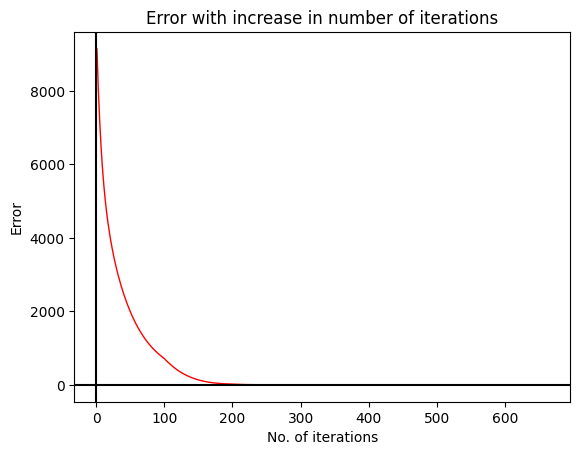

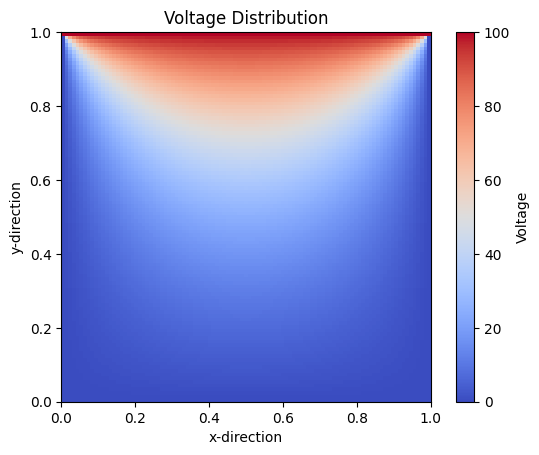

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

L=1                         #Length of the 2D surface (in m)
dx=0.01                     #Grid spacing (in m)
N=int(L/dx+1)
max_iteration=20000
tol=1e-6

#Boundary and Initial conditions at boundaries and top surface of the plane
u=np.zeros((N,N))         
u[N-1,:]=100                #Top surface at 100 V, this is the last row in the matrix since it has the maximum row index which corresponding to top surface in right-handed cartesian coordinate system         		          

w=1.93                      #w_optimal=2/(1+np.sin(np.pi/N)), w lies between 1 and 2 for fast convergence (over-relaxation), above 2 solution diverges (aggressive over-relaxation), below 1 (under-relaxation), solution converges after very long time
E=np.zeros(max_iteration)   #njit works on arrays only

#Numba-optimized solver function
@njit
def gauss_seidel(u,w,N,tol,max_iteration,E):     #need to make all variables and parameters local variables being used in the function for njit to work
    for iteration in range(max_iteration):
        u0=u.copy()	            #Store old values for error calculation
    
        #updating the array using four nearby points with initial guess and current values of updated points
        for i in range(1,N-1):
            for j in range(1,N-1):
                phi=0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
                u[i,j]=(1-w)*u[i,j]+w*phi       #Relaxation Scheme (over-relaxation for faster and aggressive convergence when 1<w<2) 
			
        err=np.sum(np.abs(u-u0))
        E[iteration]=err

        if err<tol:
            break
    
    return u,iteration,E[:iteration+1]

u,iteration,E=gauss_seidel(u,w,N,tol,max_iteration,E)

print('Solution Converged after',iteration,'iterations')

#For plotting of the error with iterations
plt.plot(range(1,iteration+2),E,'r-',lw=1)
plt.title('Error with increase in number of iterations')
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

#Contour plotting and colour mapping
plt.title('Voltage Distribution')
x=np.linspace(0,L,N)
y=np.linspace(0,L,N)
plt.xlabel('x-direction')
plt.ylabel('y-direction')
img=plt.imshow(u,cmap='coolwarm',origin='lower',extent=[0,L,0,L])  #cmap='viridis'
plt.colorbar(img,label='Voltage')
plt.show()

# Question 2 
Solution of Laplace's equation in 2D square plane around a charged capacitor using Gauss Seidel Relaxation Technique

Solution Converged after 366 iterations


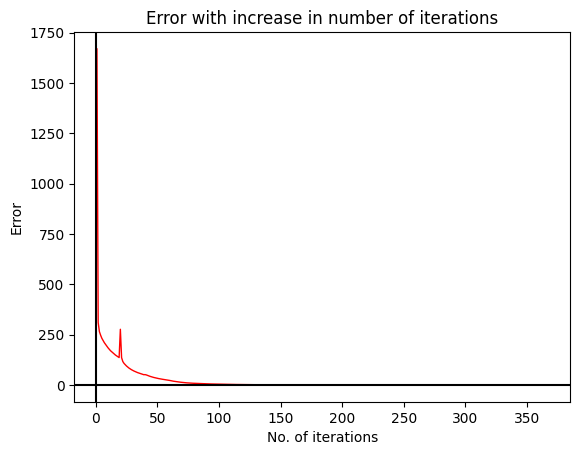

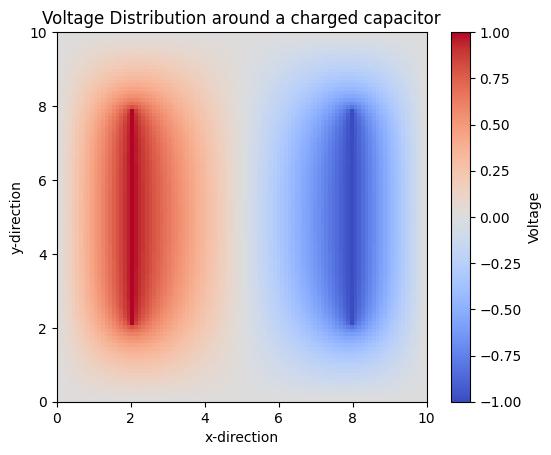

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

L=10                       #Length of the 2D surface (in m)
dx=0.1                     #Grid spacing (in m)
N=int(L/dx+1)
max_iteration=20000
tol=1e-6

#Boundary and Initial conditions for capacitor-like configuration 
#(The plates are located at x=2 and x=8 m and streches from y=2 to y=8 vertically)
u=np.zeros((N,N))         
u[20:81,20]=1
u[20:81,80]=-1

skip=np.array([20,80])      #Columns with fixed potential (plates)

w=1.94                      #w_optimal=2/(1+np.sin(np.pi/N)), w lies between 1 and 2 for fast convergence (over-relaxation), above 2 solution diverges (aggressive over-relaxation), below 1 (under-relaxation), solution converges after very long time
E=np.zeros(max_iteration)   #njit works on arrays only

@njit
def gauss_seidel(u,w,N,tol,max_iteration,E):
    for iteration in range(max_iteration):
        u0=u.copy()
        for i in range(1,N-1):
            for j in range(1,N-1):
                if 20<i<80 and j in skip:
                    continue
                phi=0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
                u[i,j]=(1-w)*u[i,j]+w*phi
        err=np.sum(np.abs(u-u0))
        E[iteration]=err
        if err<tol:
            break
    return u,iteration,E[:iteration+1]

u,iteration,E=gauss_seidel(u,w,N,tol,max_iteration,E)

print('Solution Converged after',iteration,'iterations')

plt.plot(range(1,iteration+2),E,'r-',lw=1)
plt.title('Error with increase in number of iterations')
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

plt.title('Voltage Distribution around a charged capacitor')
plt.xlabel('x-direction')
plt.ylabel('y-direction')
img=plt.imshow(u,cmap='coolwarm',origin='lower',extent=[0,L,0,L])
plt.colorbar(img,label='Voltage')
plt.show()

# Question 3
Heat Diffusion Equation with variable boundary condition

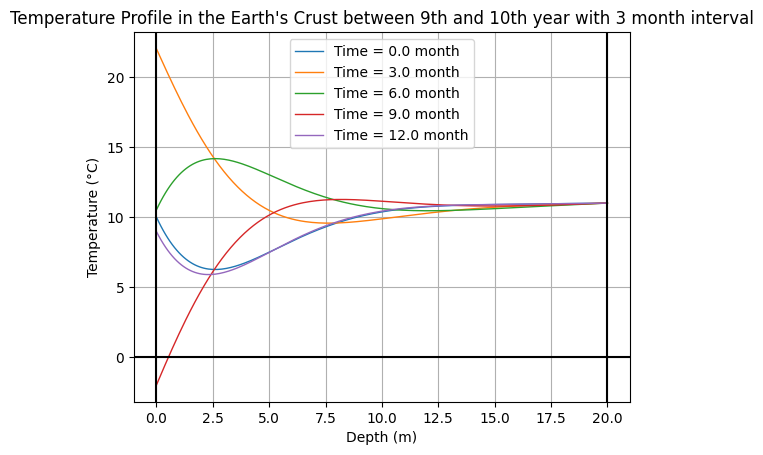

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#Constants and parameters
L=20                #Depth of the crust (in meters)
A=10                #Mean surface temperature (in °C)
B=12                #Amplitude of seasonal variation (in °C)
D=0.1               #Thermal diffusivity (m²/day)
tau=365             #Period of temperature variation (in days)
T=3650              #Total simulation time (10 years in days)
dx=0.1              #Grid spacing (in meters)
dt=0.04             #Time step (in days)
cnt=D*dt/(dx**2)    #Stability condition for the explicit scheme


Space_interval=int(L/dx)
Time_interval=int(T/dt)

x=np.linspace(0,L,Space_interval+1)
time=np.linspace(0,T,Time_interval+1)  
u=np.empty((Space_interval+1,Time_interval+1))

#Initial condition at t=0
u[1:Space_interval,0]=10        #Interior points initialized to 10
u[0,0]=A+B*np.sin(0)            #Surface boundary condition
u[Space_interval,0]=11          #Bottom boundary condition (constant 11°C)

#Time-varying boundary condition
def boundary_condition(t):
    return A+B*np.sin(2*np.pi*t/tau)

#Updating the array by time loop
for k in range(Time_interval):  #Updates all time points except t=0 
    #Update boundary condition
    u[0,k+1]=boundary_condition(time[k])  
    u[Space_interval,k+1]=11
    
    #Update interior points 
    for i in range(1,Space_interval):
        u[i,k+1]=u[i,k]+cnt*(u[i+1,k]-2*u[i,k]+u[i-1,k])


time_points=[365*9,365*9+90,365*9+180,365*9+270,365*9+360]

for t_point in time_points:
    t_index=int(t_point/dt)     #Converts days to index
    plt.plot(x,u[:,t_index],label=f'Time = {(t_point-365*9)/30} month',lw=1)
    
plt.axhline(color='black')
plt.axvline(color='black')
plt.axvline(x=x[-1],color='black')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Profile in the Earth\'s Crust between 9th and 10th year with 3 month interval')
plt.legend()
plt.grid()
plt.show()

# Question 4 
Solution of Poisson's equation in 2D square plane around two square opposite charge densities in space using Gauss Seidel Relaxation Technique

Solution Converged after 757 iterations


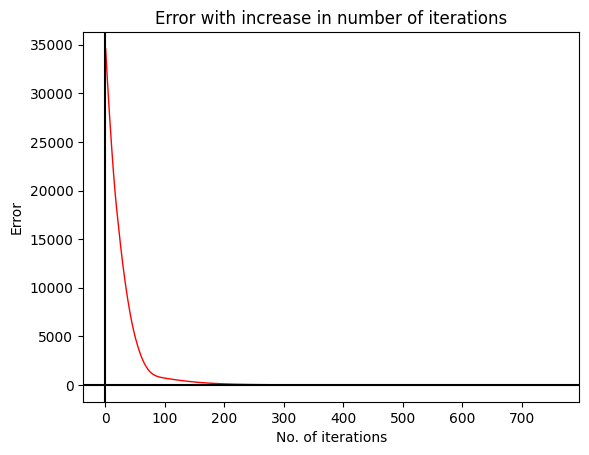

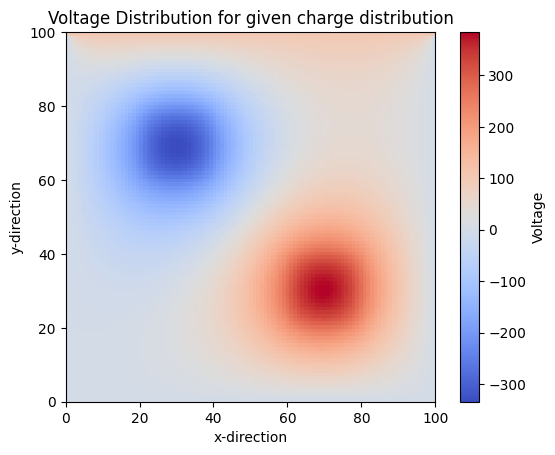

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L=100                  #Length of the 2D surface (in m)
dx=1                   #Grid spacing (in m)
N=int(L/dx+1)
max_itr=20000
tol=1e-3

#Given constants
pho=1
epsilon=1

#Boundary and Initial conditions at boundaries and top surface of the plane
u=np.zeros((N,N))
u[N-1,:]=100

w=1.9                  #w_optimal=2/(1+np.sin(np.pi/N)), w lies between 1 and 2 for fast convergence (over-relaxation), above 2 solution diverges (aggressive over-relaxation), below 1 (under-relaxation), solution converges after very long time
E=[]                   
for iteration in range(max_itr):
    u0=u.copy()        #Store old values for error calculation
    
    #updating the array using four nearby points with initial guess and current values of updated points
    for i in range(1,N-1):
        for j in range(1,N-1):
            if 20<i<40 and 60<j<80:
                phi=dx**2*pho/epsilon+0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
                u[i,j]=(1-w)*u[i,j]+w*phi    #Relaxation Scheme (over-relaxation for faster and aggressive convergence when 1<w<2) 
            
            elif 60<i<80 and 20<j<40:
                phi=-dx**2*pho/epsilon+0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
                u[i,j]=(1-w)*u[i,j]+w*phi     #Relaxation Scheme (over-relaxation for faster and aggressive convergence when 1<w<2) 
            
            else:
                phi=0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
                u[i,j]=(1-w)*u[i,j]+w*phi

    err=np.sum(np.abs(u-u0))
    E.append(err)
    
    if err<tol:
        break

print('Solution Converged after',iteration,'iterations')

#For plotting of the error with iterations
plt.plot(range(1,iteration+2),E,'r-',lw=1)
plt.title('Error with increase in number of iterations')
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()

#Contour plotting and colour mapping
plt.title('Voltage Distribution for given charge distribution')
plt.xlabel('x-direction')
plt.ylabel('y-direction')
img=plt.imshow(u,cmap='coolwarm',origin='lower',extent=[0,L,0,L])  #cmap='viridis'
plt.colorbar(img,label='Voltage')
plt.show()          